<h3>Ejercicio: escalado de datos y normalización</h3>

In [1]:
import pandas as pd
import numpy as np
from scipy import stats #transformación box-cox
from mlxtend.preprocessing import minmax_scaling #escalado min-max

# modulos para graficar
import seaborn as sns
import matplotlib.pyplot as plt

#leemos todos los datos_
kickstarters_2017 = pd.read_csv('ks_projects_201801.csv')

np.random.seed(0)

Primero escalamos las metas de cada campaña(columna '<i>usd_goal_real</i>'), que es cúanto la cantidad de dinero que se pide. Después de escalar los datos, todos los valores se encontraran entre 0 y 1.

In [78]:
usd_goals_real_df = kickstarters_2017[['usd_goal_real']]
datos_escalados_goals_real = minmax_scaling(goals_df, columns = ['usd_goal_real'])
#escalamos los datos

In [79]:
print(usd_goals_real_df.sample(3)) #3 muestras ejemplo de dataframe original
print('Valor minimo original $', float(usd_goals_real_df.min()))
print('Valor maximo original $', float(usd_goals_real_df.max()))
print('_'*45)

        usd_goal_real
356826         3500.0
261648         1000.1
321204         7000.0
Valor minimo original $ 0.01
Valor maximo original $ 166361390.71
_____________________________________________


In [80]:
print(datos_escalados_goals_real.sample(3)) #3 muestras ejemplo de dataframe con valores a escala
print('Valor minimo a escala', float(datos_escalados_goals_real.min()))
print('Valor maximo a escala', float(datos_escalados_goals_real.max()))
print('_'*45)

        usd_goal_real
343332       0.000180
373951       0.000006
165188       0.000150
Valor minimo a escala 0.0
Valor maximo a escala 1.0
_____________________________________________


Ahora vamos a proceder a escalar los valores de la columna 'goal'

In [92]:
goal_originales = kickstarters_2017[['goal']]

goal_escalados = minmax_scaling(goal_originales, columns = ['goal'])

print ('_'*90)

__________________________________________________________________________________________


In [89]:
print(goal_originales.sample(3)) #3 muestras aleatorioas de ejemplo para goal original
print('Valor minimo original $', float(goal_originales.min()))
print('Valor maximo original $', float(goal_originales.max()))
print('_'*45)

           goal
272139   4000.0
92309   55000.0
362648   4000.0
Valor minimo original $ 0.01
Valor maximo original $ 100000000.0
_____________________________________________


In [88]:
print(goal_escalados.sample(3)) #3 muestras aleatorioas de ejemplo para goal original
print('Valor minimo a escala', float(goal_escalados.min()))
print('Valor maximo a escala', float(goal_escalados.max()))
print('_'*45)

           goal
272121  0.00003
63380   0.00025
180619  0.00012
Valor minimo a escala 0.0
Valor maximo a escala 1.0
_____________________________________________


<h3>Practica de la normalización</h3>
<p>Empezamos normalizando la cantidad de dinero que ha sido destinado en apoyo a cada campaña.</p>
    
    Pledge (apoyo o promesa en castellano): es la cantidad de dinero con la que se apoya la campaña de crowdfunding y los niveles de pledge (el dinero que debemos invertir) vienen predefinidos en la descripción de la campaña.

In [126]:
indice_de_apoyos_positivos

0         False
1          True
2          True
3          True
4          True
          ...  
378656     True
378657     True
378658     True
378659     True
378660     True
Name: usd_pledged_real, Length: 378661, dtype: bool

In [168]:
# Tomamos el indice de todos las donaciones o contribuciones('pledge') (la transformación Box-Cox solo toma valores positivos)
indice_de_apoyos_positivos = kickstarters_2017.usd_pledged_real > 0



# Usando su indice, tomamos solo los valores de apoyos positivos
apoyos_positivos = kickstarters_2017['usd_pledged_real'].loc[indice_de_apoyos_positivos]



# Normalizamos los apoyos o contribuciones(con Box-Cox)
apoyos_normalizados = pd.Series(stats.boxcox(apoyos_positivos)[0], 
                               name='usd_pledged_real', index=apoyos_positivos.index)

In [169]:
print('Datos Originales \nPreview:\n', apoyos_positivos.head())
print('Valor Minimo:', float(apoyos_positivos.min()),
      '\nValor Maximo :', float(apoyos_positivos.max()))
print('_'*30)

print('\nDatos normalizados\nPreview:\n', apoyos_normalizados.head())
print('Valor minimo:', float(apoyos_normalizados.min()),
      '\nValor maximo:', float(apoyos_normalizados.max()))

Datos Originales 
Preview:
 1     2421.0
2      220.0
3        1.0
4     1283.0
5    52375.0
Name: usd_pledged_real, dtype: float64
Valor Minimo: 0.45 
Valor Maximo : 20338986.27
______________________________

Datos normalizados
Preview:
 1    10.165142
2     6.468598
3     0.000000
4     9.129277
5    15.836853
Name: usd_pledged_real, dtype: float64
Valor minimo: -0.7779954122762203 
Valor maximo: 30.69054020451361


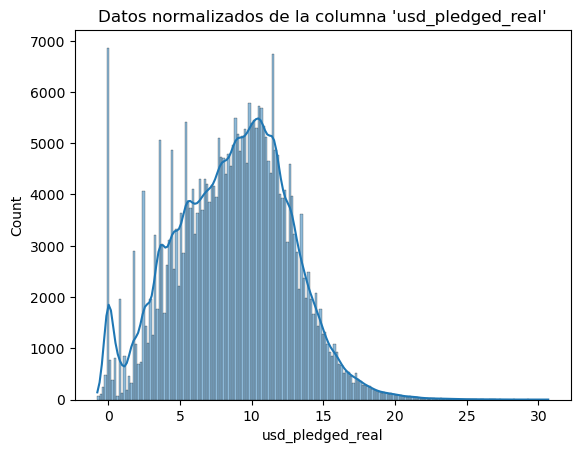

In [208]:
ax = sns.histplot(apoyos_normalizados, kde=True)
ax.set_title("Datos normalizados de la columna 'usd_pledged_real'")
plt.show()

<hr>
<b>Ahora procedemos a normalizar los datos en la columna 'pledged' de manera similar</b>

In [171]:
indice_p_pledged = kickstarters_2017['pledged'] > 0 #valores mayores a cero


pledge_p = kickstarters_2017['pledged'].loc[indice_p_pledged]


#Aplicamos la normalización y creamos un narray de los valores:
valores_pledge_norm = stats.boxcox(pledge_p)[0]


#Los convertimos a un objeto de tipo Serie de Pandas con los datos normalizados para la columna Pledge:
pledge_normalizado = pd.Series(valores_pledge_norm, name='pledged', index=pledge_p.index)

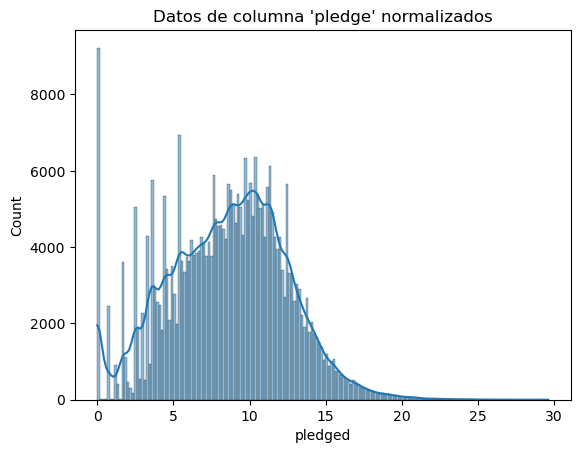

In [217]:
#Graficamos los datos de la columna 'pledge', ahora la variable ax1 corresponde al grafico de esta columna.
# la variable ax (sin el 1) corresponde al grafico de la columna 'usd_pledged_real
ax1 = sns.histplot(pledge_normalizado, kde=True)
ax1.set_title("Datos de columna 'pledge' normalizados")
plt.show()

<hr>
<b>Ahora vamos a ver juntos a ambos graficos para evaluar su diferencia:</b>

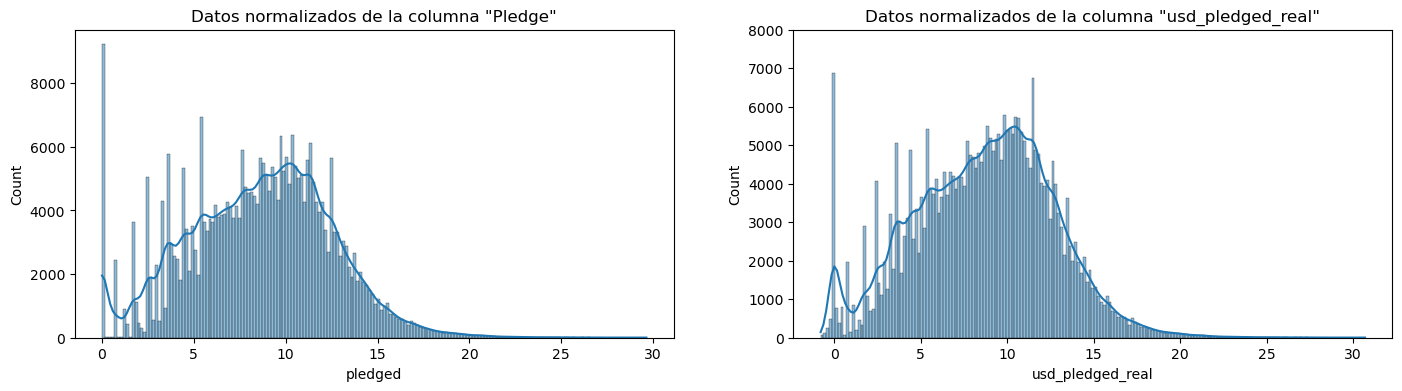

In [222]:
fig, ax3 = plt.subplots(1, 2, figsize=(17, 4))

sns.histplot(pledge_normalizado, ax= ax3[0], kde=True)
sns.histplot(apoyos_normalizados, ax = ax3[1], kde=True)

ax3[0].set_title('Datos normalizados de la columna "Pledge"')
ax3[1].set_title('Datos normalizados de la columna "usd_pledged_real"')
ax3[1].set_ylim(0, 8000)
plt.show()

Podemos notar más facilmente la desigualdad de ambos gráficos pero comparten gran similitud.